# AYA Project

Les donnees proviennent de plusieurs sources:
* Leucegene:
500 patients dont 80 AYA
donnees:  p-value analyse expression differentielle
non normalise 
analyse avec DeSeq2
* TGCA: ~ 200 adultes
* Target (https://ocg.cancer.gov/programs/target/projects/acute-myeloid-leukemia):
Les chercheurs de TARGET analysent les tumeurs de patients pediatriques, dont beaucoup ont fait une rechute, afin d'identifier des biomarqueurs en correlation avec de mauvais resultats cliniques et / ou de nouvelles approches therapeutiques pour traiter la LMA chez l'enfant. (200 patients)


But : Analyse expression differentielle, mettre en evidence des genes specifique aux Adolescents et jeunes Adultes (18-40 ans).



In [1]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("DESeq2", version = "3.8")
library("DESeq2")
#BiocManager::install("genefilter", version = "3.8")
library(genefilter)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which

In [2]:
library('plyr') #package pour table de comptage
library(magrittr)
library("varhandle")
#library(tidyr)


Attaching package: ‘plyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:IRanges’:

    desc

The following object is masked from ‘package:S4Vectors’:

    rename



### SOUS GROUPE ADVERSE

### DE complex vs other subgroup

In [3]:
data_API = read.csv("/home/safia/Documents/AYA/Leucegene risk complete.txt",header = T,sep = "\t")
data_API<- data.frame(data_API[,-1], row.names=data_API[,1])

t_data_API = as.data.frame(t(data_API)) # inverse colonne ligne
colnames(t_data_API) <- gsub(" ","_",colnames(t_data_API)) # remplace les espaces dans le nom des colonnes
t_data_API <- head(t_data_API, -1) # supprimme la deriniere ligne data_type 

inf_40 = t_data_API[which(as.integer(t_data_API$Age_at_diagnosis)<=40),]
data_AYA = inf_40[which(as.integer(inf_40$Age_at_diagnosis)>=18),]

In [4]:
adverse = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="adverse cytogenetics"),])
API_Adv = data_AYA[which(rownames(data_AYA) %in% adverse),]
count_Adv_subgroup = count(API_Adv, "cytogenetic_subgroup")

In [5]:
complex = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[1]),])

mll = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[3]),])

m5_m7 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[4]),])

m17 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[5]),])

t6_9 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[6]),])

In [6]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]
names(read_count) = substring(names(read_count),8)

In [7]:
library("tidyr")
library("dplyr")
library("ggplot2")


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract

The following object is masked from ‘package:S4Vectors’:

    expand


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects a

In [8]:
mll = substring(mll,2)
count_mll = read_count[,mll]
colnames(count_mll) = paste("MLL", colnames(count_mll), sep = "_")

complex = substring(complex,2)
count_complex = read_count[,complex]
colnames(count_complex) = paste("Cpx", colnames(count_complex), sep = "_")


m5_m7 = substring(m5_m7,2)
count_m5_m7 = read_count[,m5_m7]
colnames(count_m5_m7) = paste("M57", colnames(count_m5_m7), sep = "_")


t6_9 = substring(t6_9,2)
count_t6_9 = read_count[,t6_9]
colnames(count_t6_9) = paste("t69", colnames(count_t6_9), sep = "_")


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 2662 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000170689.9,280.68569,8.999873,1.1547993,7.793451,6.520314e-15,1.151746e-10
ENSG00000130528.11,66.97690,-22.099176,2.8571373,-7.734727,1.036255e-14,1.151746e-10
ENSG00000204644.9,426.73695,-24.548897,3.5203946,-6.973337,3.095107e-12,2.293371e-08
ENSG00000163491.16,95.57071,5.336641,0.8169069,6.532740,6.457709e-11,3.588710e-07
ENSG00000082556.10,20.53300,-18.175922,2.8357341,-6.409600,1.459018e-10,5.789709e-07
ENSG00000166923.10,683.20679,-21.838396,3.4127183,-6.399120,1.562745e-10,5.789709e-07


Row.names,groups,sizeFactor,replaceable,gene,expression
1,Cpx,0.8635474,TRUE,ENSG00000170689.9,3.594565
10,Cpx,1.0564057,TRUE,ENSG00000170689.9,6.992601
11,Cpx,0.8734936,TRUE,ENSG00000170689.9,3.710736
12,Cpx,1.1166711,TRUE,ENSG00000170689.9,3.097555
13,Cpx,1.1108890,TRUE,ENSG00000170689.9,3.248201
14,Cpx,0.8437319,TRUE,ENSG00000170689.9,-1.000000


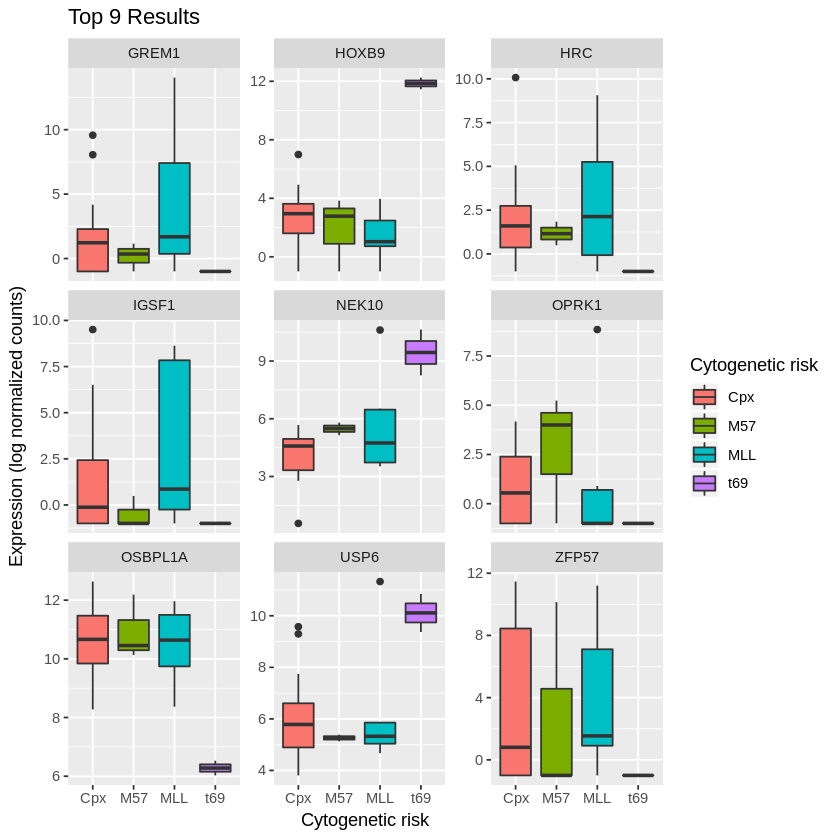

In [9]:
df_IF = cbind(count_complex,count_mll,count_m5_m7,count_t6_9)


samples_IF <- data.frame(groups = substr(colnames(df_IF), 1, 3))


ds_IF <- DESeqDataSetFromMatrix(countData=df_IF, colData=samples_IF, design=~groups)
colnames(ds_IF) <- colnames(counts)
ds_IF <-DESeq(ds_IF)
res_IF <- results(ds_IF)


res <- results(ds_IF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_IF)))


tcounts <- t(log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_IF), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)

library('biomaRt')
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
        if (a != ""){
            tcounts$gene[i] = a
        }
         
    }
}

ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")


Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”



|Gene.symbol |      logFC| adj.P.Val|
|:-----------|----------:|---------:|
|HOXB9       |   8.999873|     0e+00|
|HRC         | -22.099176|     0e+00|
|ZFP57       | -24.548897|     0e+00|
|NEK10       |   5.336640|     4e-07|
|OPRK1       | -18.175922|     6e-07|
|GREM1       | -21.838396|     6e-07|

Warning message in run_pathfindR(res_mart_na, pin_name = "KEGG", gene_sets = "KEGG", :
“There already is a directory named "pathfindR_Results".
Writing the result to "pathfindR_Results(3)" not to overwrite the previous results.”## Testing input


The input looks OK


## Processing input. Converting gene symbols, if necessary (and if human gene symbols provied)


Could not find any interactions for 123 (77.36%) genes in the PIN


## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations 


## Annotating involved genes and visualizing pathways


'select()' returned 1:1 mapping between keys and columns
Info: Downloading xml files for hsa05200, 1/1 pathways..
Info: Downloading png files for hsa05200, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/safia/Documents/pathfindR_Results(3)/pathway_visualizations
Info: Writing image file hsa05200.Pathways in cancer.png
Info: some node wi

  |......................                                           |  33%
   inline R code fragments

  |...........................................                      |  67%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |.................................................................| 100%
  ordinary text without R code




output file: results.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS results.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc1d2c77215edf.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmp4XQPhZ/rmarkdown-str1d2c6582c58f.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: results.html


processing file: enriched_pathways.Rmd


  |.......                                                          |  11%
   inline R code fragments

  |..............                                                   |  22%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |......................                                           |  33%
  ordinary text without R code

  |.............................                                    |  44%
label: pathview (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA

  |....................................                             |  56%
  ordinary text without R code

  |...........................................                      |  67%
label: table (with options) 
List of 2
 $ echo   : symbol F
 $ comment: logi NA

  |...................................................              |  78%
  ordinary text without R code

  |..........................................................       |  89%
label: pathview_ref (with options) 
List of 2


output file: enriched_pathways.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS enriched_pathways.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc1d2c479699ae.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmp4XQPhZ/rmarkdown-str1d2c26ababb6.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: enriched_pathways.html


processing file: conversion_table.Rmd


  |...........                                                      |  17%
   inline R code fragments

  |......................                                           |  33%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |................................                                 |  50%
  ordinary text without R code

  |...........................................                      |  67%
label: table1 (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA

  |......................................................           |  83%
  ordinary text without R code

  |.................................................................| 100%
label: table2 (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA




output file: conversion_table.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS conversion_table.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc1d2c37b5bf75.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmp4XQPhZ/rmarkdown-str1d2c498e6d34.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: conversion_table.html
Plotting the enrichment bubble chart


Found 36 enriched pathways


Pathway enrichment results and table of converted genes 
can be found in "results.html" 
in the folder "/home/safia/Documents/pathfindR_Results(3)"


Run choose_clusters() for clustering pathways






|ID       |Pathway                    | Fold_Enrichment| occurrence| lowest_p| highest_p|Up_regulated |Down_regulated                                                        |
|:--------|:--------------------------|---------------:|----------:|--------:|---------:|:------------|:---------------------------------------------------------------------|
|hsa05200 |Pathways in cancer         |        2.272042|          9|  0.0e+00| 0.0383372|ADCY2, GLI2  |LRP6, GNG2, PTK2, IL12RB2, JAK2, FGF16, MECOM, GSTM1, GSTM5, BMP2, AR |
|hsa04151 |PI3K-Akt signaling pathway |        2.492391|          2|  1.1e-06| 0.0158573|             |FGF16, JAK2, PTK2, GNG2                                               |

The maximum average silhouette width was 14.79 for k = 13 




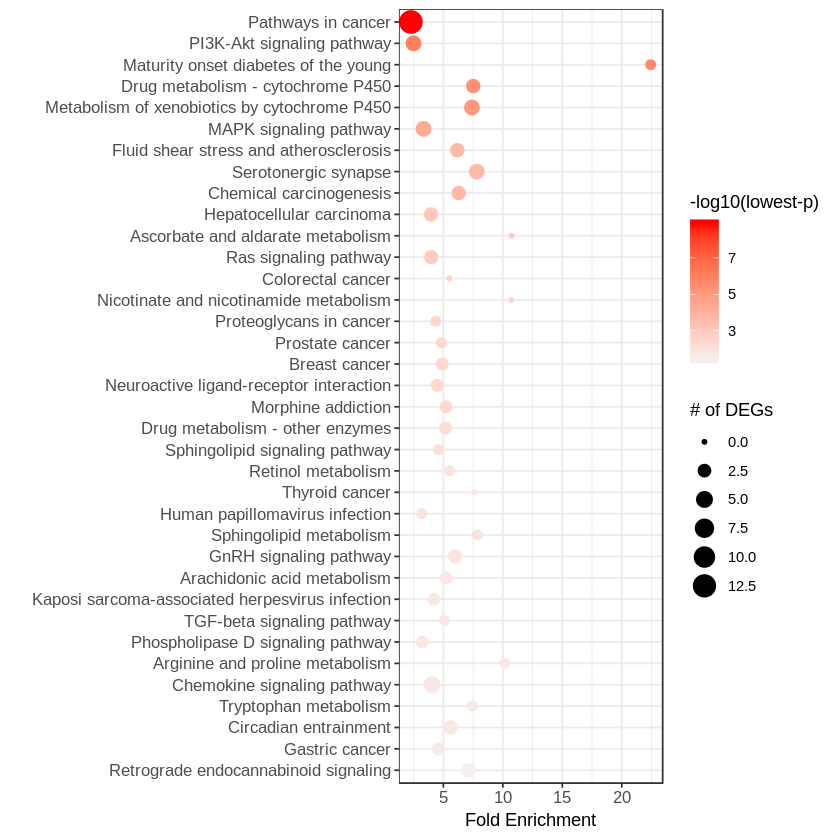



|ID       |Pathway                    | Fold_Enrichment| occurrence| lowest_p| highest_p|Up_regulated |Down_regulated                                                        | Cluster|Status         |
|:--------|:--------------------------|---------------:|----------:|--------:|---------:|:------------|:---------------------------------------------------------------------|-------:|:--------------|
|hsa05200 |Pathways in cancer         |        2.272042|          9|  0.0e+00| 0.0383372|ADCY2, GLI2  |LRP6, GNG2, PTK2, IL12RB2, JAK2, FGF16, MECOM, GSTM1, GSTM5, BMP2, AR |       1|Representative |
|hsa04151 |PI3K-Akt signaling pathway |        2.492391|          2|  1.1e-06| 0.0158573|             |FGF16, JAK2, PTK2, GNG2                                               |       1|Member         |



|   |ID       |Pathway                                 | Fold_Enrichment| occurrence|  lowest_p| highest_p|Up_regulated |Down_regulated                                                        | Cluster|Status         |
|:--|:--------|:---------------------------------------|---------------:|----------:|---------:|---------:|:------------|:---------------------------------------------------------------------|-------:|:--------------|
|1  |hsa05200 |Pathways in cancer                      |        2.272042|          9| 0.0000000| 0.0383372|ADCY2, GLI2  |LRP6, GNG2, PTK2, IL12RB2, JAK2, FGF16, MECOM, GSTM1, GSTM5, BMP2, AR |       1|Representative |
|3  |hsa04950 |Maturity onset diabetes of the young    |       22.431522|          1| 0.0000020| 0.0000020|             |NR5A2                                                                 |       2|Representative |
|4  |hsa00982 |Drug metabolism - cytochrome P450       |        7.513295|          2| 0.0000043| 0.0161777|             |GSTM1

The maximum average silhouette width was 14.79 for k = 13 




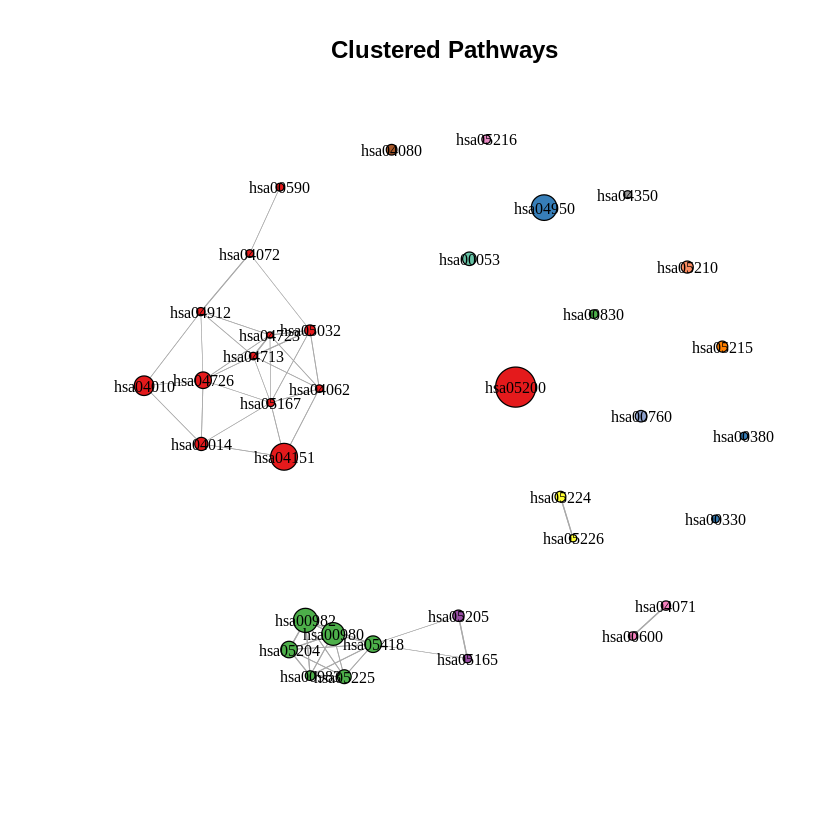

The maximum average silhouette width was 14.79 for k = 13 




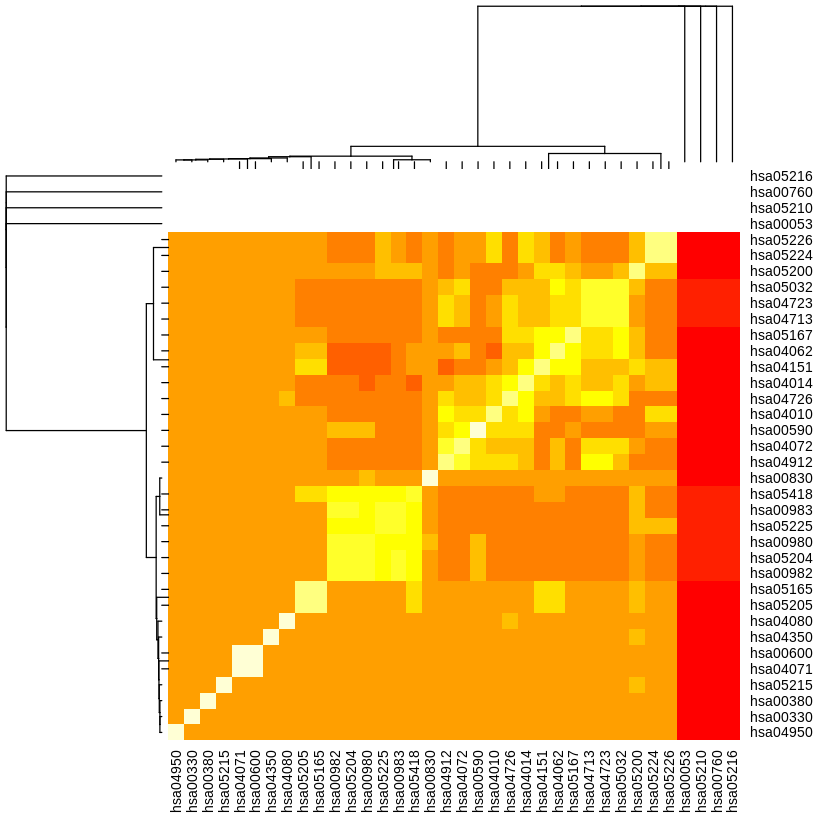

Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”

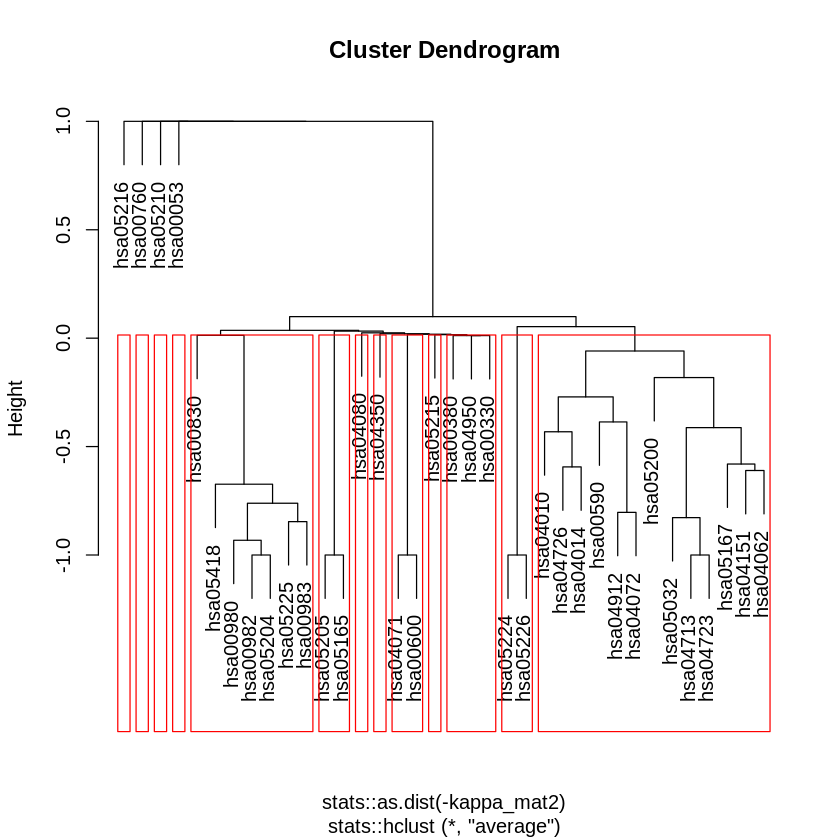

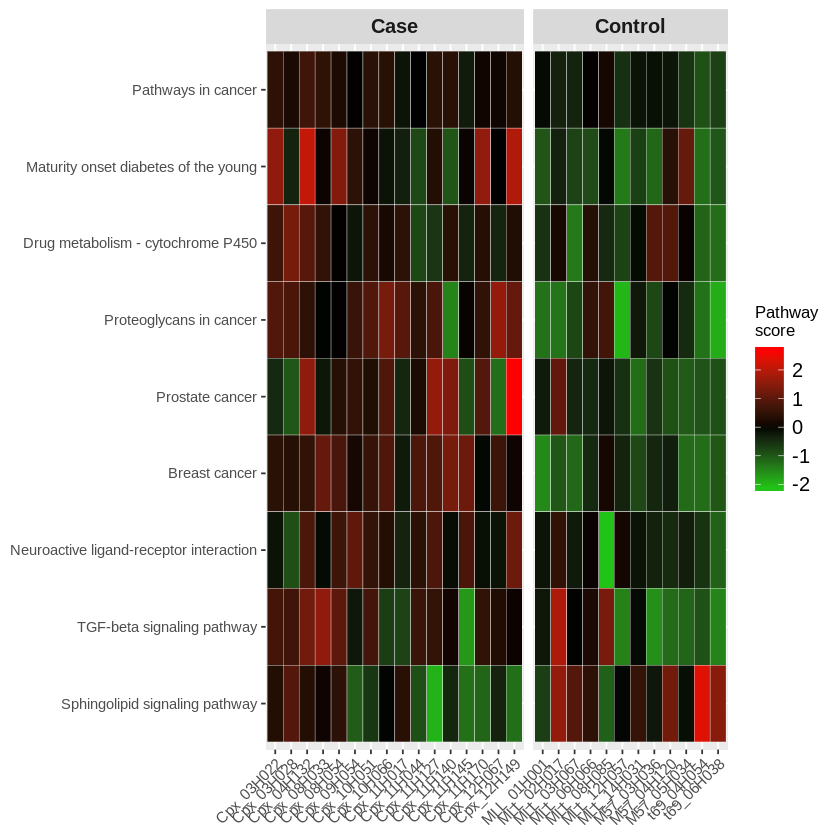

In [10]:
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- res$row
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
                                                          "hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
  if (genes[i] %in% G_list$ensembl_gene_id){
    a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    if (a != ""){
      res$row[i] = a
    }
    
  }
}

res_mart = res[,c(1,3,7)]
colnames(res_mart)= c("Gene.symbol","logFC","adj.P.Val")

res_mart_na = as.data.frame(na.omit(res_mart))
res_mart_na$adj.P.Val = as.numeric(as.character(res_mart_na$adj.P.Val))

suppressPackageStartupMessages(library(pathfindR))

knitr::kable(head(res_mart_na))
RA_output <- run_pathfindR(res_mart_na, pin_name = "KEGG", gene_sets = "KEGG", search_method = "SA")
knitr::kable(head(RA_output, 2))

RA_clustered <- cluster_pathways(RA_output)
knitr::kable(head(RA_clustered, 2))
knitr::kable(RA_clustered[RA_clustered$Status == "Representative", ])
RA_clustered <- cluster_pathways(RA_output, plot_hmap = TRUE, plot_clusters_graph = FALSE)
RA_clustered <- cluster_pathways(RA_output, plot_dend = TRUE, plot_clusters_graph = FALSE)

## Pathway scores per samples
## Pathway data frame
pws_table <- RA_clustered
pws_table <- pws_table[pws_table$Status == "Representative", ]


## Expression matrix
  goi <- rownames(res_IF)
stopifnot(all(goi %in% names(ds_IF)))
exp_mat <- log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))

colnames(exp_mat) = colnames(df_IF)

mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- rownames(exp_mat)
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
                                                          "hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
  if (genes[i] %in% G_list$ensembl_gene_id){
    a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    if (a != ""){
      rownames(exp_mat)[i] = a
    }
    
  }
}



## Vector of "Case" IDs
cases <- colnames(count_complex)

## Calculate pathway scores and plot heatmap
score_matrix <- calculate_pw_scores(pws_table, exp_mat, cases, case_control_titles = c("Complex", "Other"))


### DE Complex

In [37]:
library(ggplot2)

In [38]:
count_Adv_subgroup$cytogenetic_subgroup = gsub("\\s*\\([^\\)]+\\)","",as.character(count_Adv_subgroup$cytogenetic_subgroup))
count_Adv_subgroup$cytogenetic_subgroup[6] = "t(6;9)"
count_Adv_subgroup$cytogenetic_subgroup

[1] "Complex"                         "EVI1 rearrangements"            
[3] "MLL translocations"              "Monosomy 5/ 5q-/Monosomy 7/ 7q-"
[5] "Monosomy17/del17p"               "t(6;9)"

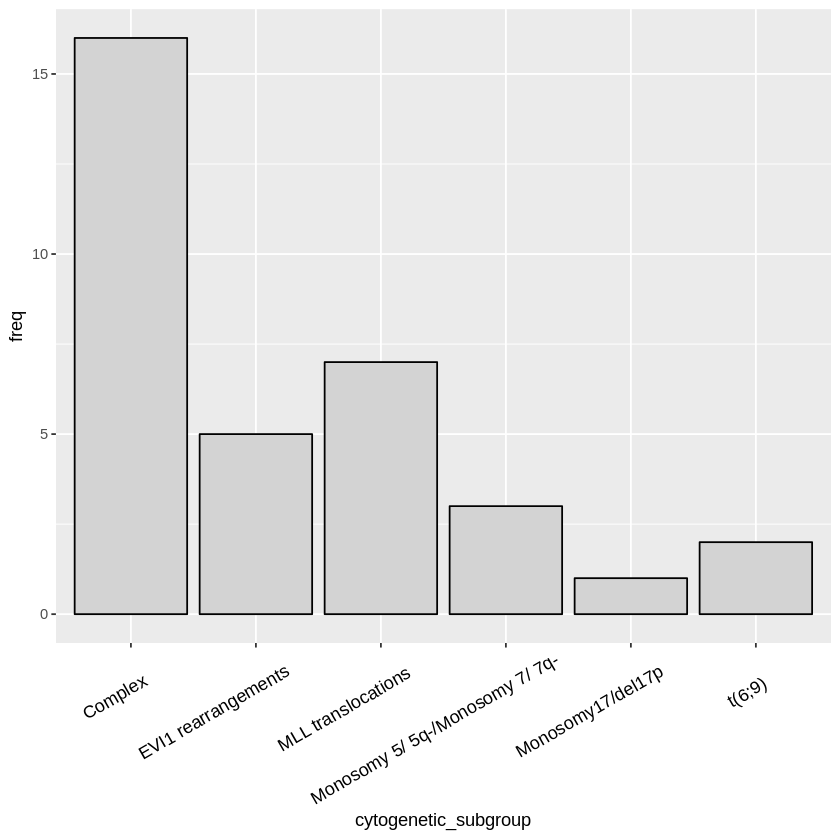

In [39]:


ggplot(count_Adv_subgroup, aes(x = cytogenetic_subgroup, y = freq)) +
  geom_bar(stat = "identity", fill = "lightgray", 
           color = "black") + theme(axis.text.x=element_text(color = "black", size=11, angle=30, vjust=.8, hjust=0.8))

In [51]:
complex = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[1]),])

mll = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[3]),])

m5_m7 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[4]),])

m17 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[5]),])

t6_9 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[6]),])

### Classification groupe complexe

In [41]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]
names(read_count) = substring(names(read_count),8)


In [8]:
complex = substring(complex,2)
count_complex = read_count[,complex]


In [9]:
cohort_IQR = apply(count_complex,1,IQR)

In [10]:
rank_cohort_IQR = rank(cohort_IQR)

In [11]:
ordered_data=count_complex[order(-rank_cohort_IQR),]

In [12]:
tordered_data=t(ordered_data)


In [13]:
sample_dist=dist(tordered_data[,c(1:500)], method = "euclidean")

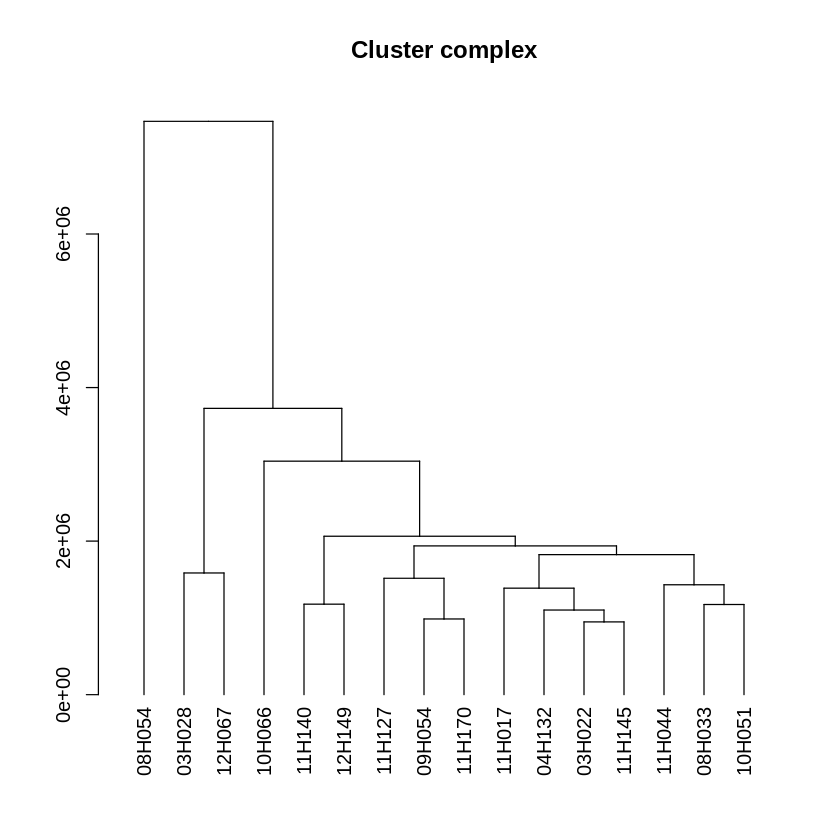

In [15]:
hc=hclust(sample_dist, method = "complete", members = NULL)

plot(as.dendrogram(hc), cex=0.3, main = "Cluster complex")

#### information mutation p53

In [17]:
library(dendextend)

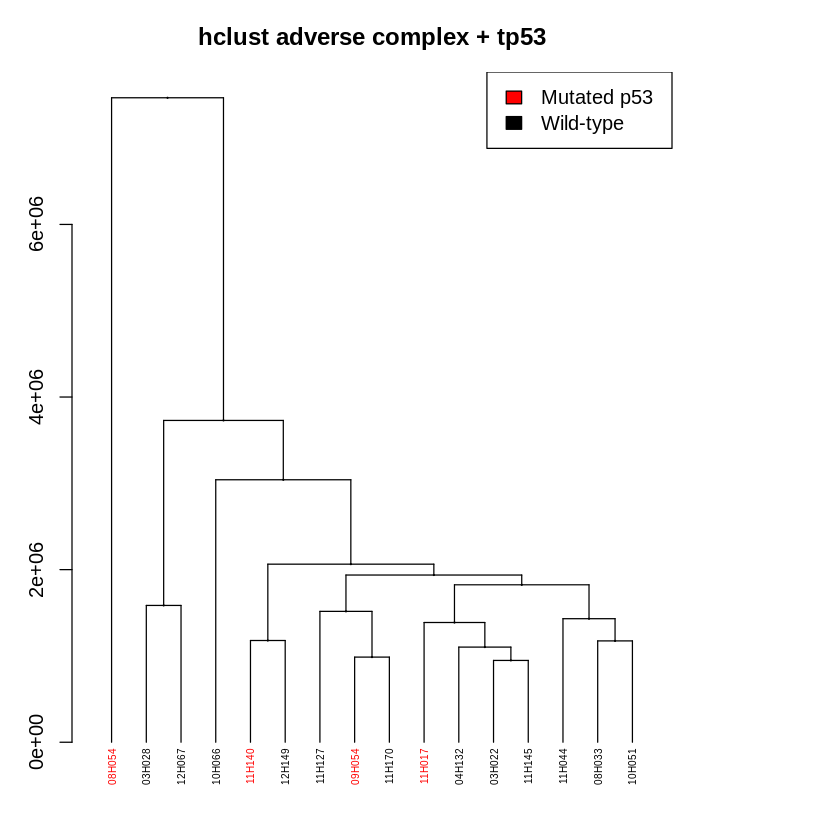

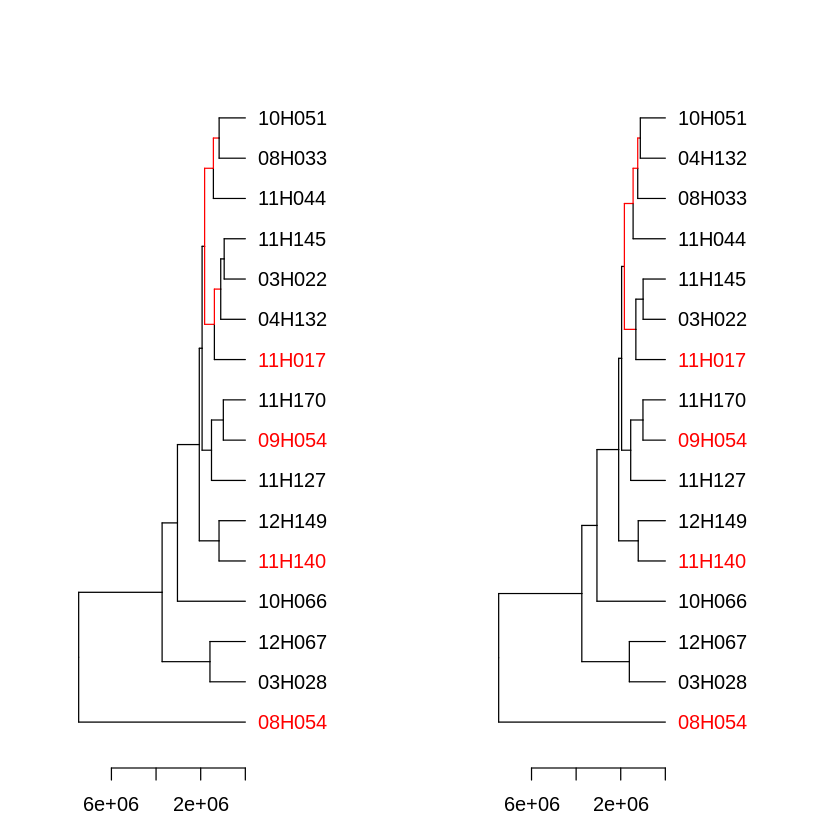

In [18]:
tp53_mutations = read.table("/home/safia/Documents/AYA/tp53_mutations.txt", header = T, sep="\t")
tp53 = colnames(tp53_mutations[2:171])
tp53 = substring(tp53,2)
cohort_IQR = apply(count_complex,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)
ordered_data=count_complex[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)

sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
dend <- as.dendrogram(hc_500)
dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% tp53, 2, 1)) 

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + tp53", 
       nodePar = list(cex = .007)) # plot
legend("topright", legend = c("Mutated p53","Wild-type"), fill = c("red","black"))

sample_dist_1000=dist(tordered_data[,c(1:1000)], method = "euclidean")
hc_1000=hclust(sample_dist_1000, method = "complete", members = NULL)
dend1 <- as.dendrogram(hc_1000)
dend3 <- color_labels(dend1, col = ifelse(labels(hc_1000) %in% tp53, 2, 1)) 
dend_diff(dend2, dend3)

#### complex + 5 MLL

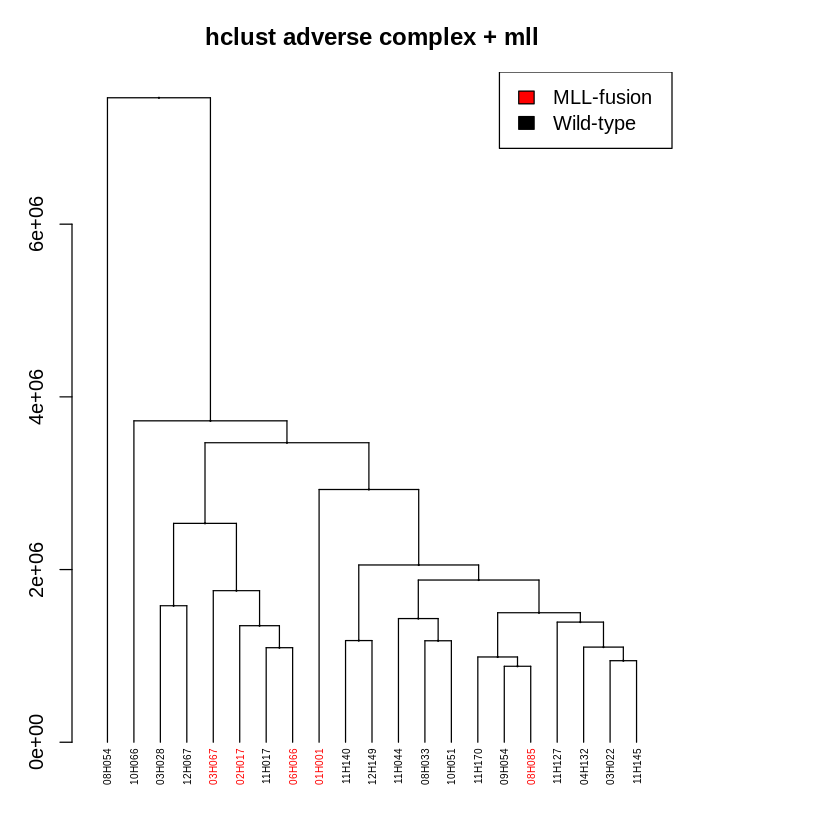

In [19]:
mll = substring(mll,2)
count_mll = read_count[,mll[1:5]]
mll_complex = cbind(count_complex,count_mll)
cohort_IQR = apply(mll_complex,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)

ordered_data=mll_complex[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)
sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
dend <- as.dendrogram(hc_500)


dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% mll, 2, 1)) 

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + mll", 
       nodePar = list(cex = .007)) # plot
legend("topright", legend = c("MLL-fusion","Wild-type"), fill = c("red","black"))

#### Complex + 5 MLL + tp53

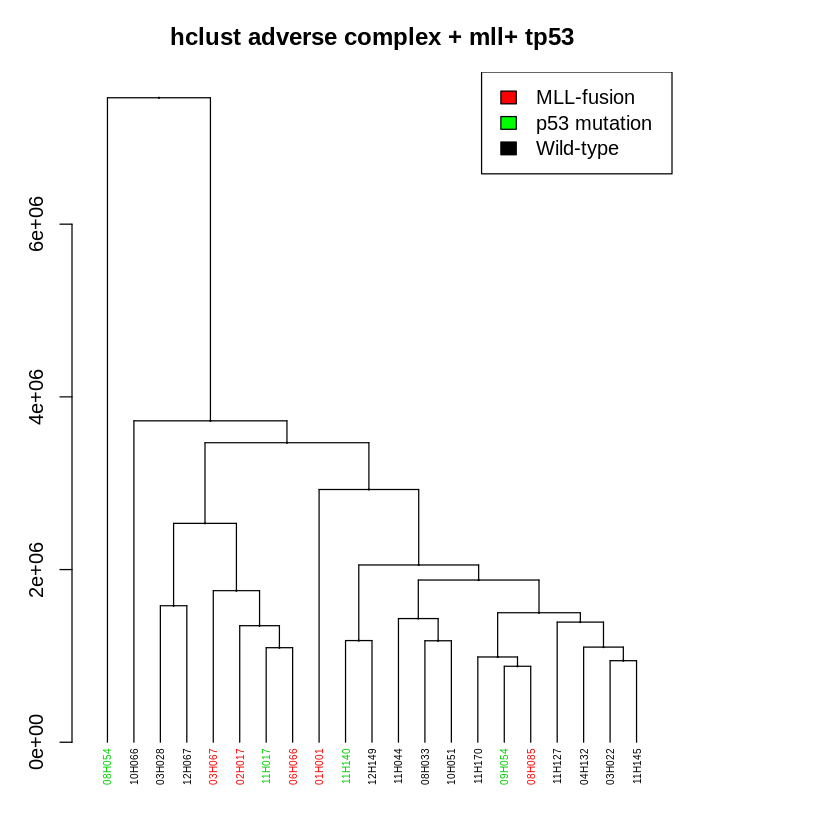

In [20]:
dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% mll , 2 , ifelse(labels(hc_500) %in% tp53, 3, 1))) 

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + mll+ tp53", 
       nodePar = list(cex = .007)) # plot
legend("topright", legend = c("MLL-fusion","p53 mutation","Wild-type"), fill = c("red","green","black"))

#### Other mutation

In [ ]:
df = read.csv("/home/safia/Documents/AYA/RE__info/API_getTable_db7114.xls",header = T,sep = "\t")
df = df[,-c(1,511:514,516:523)]
library(dplyr)
df_2 <- df %>% dplyr::na_if("-")

test <- data.frame(patient=character(),
                 genes=character(),
                 stringsAsFactors=FALSE)

flag=0
for (n in 1:509){
  for (j in 1:length(levels(df_2[which(df_2[n]!="<NA>"),510]))){
    test[flag+j,2] = as.character(df_2[which(df_2[n]!="<NA>"),510][j])
    test[flag+j,1] = colnames(df_2[n])
  }
  flag=flag+j
  }

test = test[!duplicated(test), ]
test = na.omit(test)
library(plyr)
table_genes = count(test, "genes")

write.table(table_genes[order(table_genes$freq, decreasing = T),], "/home/safia/Documents/AYA/RE__info/db7114/table_mutations_freq.csv", col.names= T, row.names= F, quote= F,sep ="\t")


test_2 = test[-c(which(test$genes %in% table_genes[which(table_genes$freq == 1),]$genes)),]


X<-split(test_2, test_2$genes)

filenames <- names(X)


for (i in 1:length(X)){
  outname <- paste("/home/safia/Documents/AYA/RE__info/db7114/", filenames[i], ".csv", sep= "")
  write.table(X[[i]], outname, col.names= F, row.names= F, quote= F,sep ="\t")
}


##############
df = read.csv("/home/safia/Documents/AYA/RE__info/API_getTable_185701.xls",header = T,sep = "\t")
df = df[,-c(1,511:514,516:523)]

df_2 <- df %>% dplyr::na_if("-")

test <- data.frame(patient=character(),
                   genes=character(),
                   stringsAsFactors=FALSE)

flag=0
for (n in 1:509){
  for (j in 1:length(levels(df_2[which(df_2[n]!="<NA>"),510]))){
    test[flag+j,2] = as.character(df_2[which(df_2[n]!="<NA>"),510][j])
    test[flag+j,1] = colnames(df_2[n])
  }
  flag=flag+j
}

test = test[!duplicated(test), ]
test = na.omit(test)

table_genes = count(test, "genes")



write.table(table_genes[order(table_genes$freq, decreasing = T),], "/home/safia/Documents/AYA/RE__info/1857701/table_mutations_freq.csv", col.names= T, row.names= F, quote= F,sep ="\t")

test_2 = test[-c(which(test$genes %in% table_genes[which(table_genes$freq == 1),]$genes)),]


X<-split(test_2, test_2$genes)

filenames <- names(X)


for (i in 1:length(X)){
  outname <- paste("/home/safia/Documents/AYA/RE__info/1857701/", filenames[i], ".csv", sep= "")
  write.table(X[[i]], outname, col.names= F, row.names= F, quote= F,sep ="\t")
}


In [ ]:
#mll = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[3]),])

#mll = substring(mll,2)
#count_mll = read_count[,mll[1:5]]
mll_complex = cbind(count_complex,count_mll)
cohort_IQR = apply(mll_complex,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)

ordered_data=mll_complex[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)

sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
dend <- as.dendrogram(hc_500)


In [ ]:
files = list.files(path = "/home/safia/Documents/AYA/RE__info/1857701/", pattern = "*.csv")
pdf("/home/safia/Documents/hclust_mutation.pdf")
for (ele in files){
    nbpf1_mutations = read.table(paste("/home/safia/Documents/AYA/RE__info/1857701/",ele,sep = ""), header = F,sep="\t")
    nbpf1 = nbpf1_mutations$V1
    nbpf1 = substring(nbpf1,2)
    dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% mll , 2, ifelse(labels(hc_500) %in% nbpf1, 3, 1))) 
    par(mar = c(3,3,3,7))
    dend2 %>%   set("labels_cex", 0.5) %>% 
      plot(main = paste("hclust adverse complex +",substring(ele,1,nchar(ele)-4)), 
           nodePar = list(cex = .007)) 
    legend("topright", legend = c("MLL-fusion",paste("Mutated ",substring(ele,1,nchar(ele)-4)),"Wild-type"), fill = c("red","green","black"))
    }
dev.off()

#### clustering PAM

In [22]:
library(cluster)
library(dplyr)
library(ggplot2)
library(readr)
library(Rtsne)
library(ISLR) # for college dataset

In [23]:
cohort_IQR = apply(count_complex,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)
ordered_data=count_complex[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)

In [24]:

gower_dist <- daisy(tordered_data[,c(1:500)],
                    metric = "gower",
                    type = list(logratio = 3))


#summary(gower_dist)



gower_mat <- as.matrix(gower_dist)



In [25]:
#Patients les plus proches
tordered_data[
  which(gower_mat == min(gower_mat[gower_mat != min(gower_mat)]),
        arr.ind = TRUE)[1, ], ]

#Patients les plus éloigné
tordered_data[
  which(gower_mat == max(gower_mat[gower_mat != max(gower_mat)]),
        arr.ind = TRUE)[1, ], ]


ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,ENSG00000244734.3,ENSG00000198804.2,ENSG00000156508.17,ENSG00000198938.2,ENSG00000198886.2,ENSG00000005381.7,ENSG00000210082.2,ENSG00000198888.2,ENSG00000090382.6,ENSG00000198712.1,⋯,ENSG00000210135.1,ENSG00000210151.2,ENSG00000210154.1,ENSG00000210156.1,ENSG00000210164.1,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000210195.2
11H170,104491,385429,968455,202870,209480,4651,118062,48830,21661,210362,⋯,0,0,0,0,0,0,0,0,0,0
09H054,207482,336206,219873,196941,210101,28352,154381,71664,14332,196645,⋯,0,0,0,0,0,0,0,0,0,0


ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,ENSG00000244734.3,ENSG00000198804.2,ENSG00000156508.17,ENSG00000198938.2,ENSG00000198886.2,ENSG00000005381.7,ENSG00000210082.2,ENSG00000198888.2,ENSG00000090382.6,ENSG00000198712.1,⋯,ENSG00000210135.1,ENSG00000210151.2,ENSG00000210154.1,ENSG00000210156.1,ENSG00000210164.1,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000210195.2
11H140,1179026,631364,1103614,343939,404179,318238,428366,187531,246218,278326,⋯,0,0,0,0,0,0,0,0,0,0
03H028,216674,2439452,626153,1115495,981391,34508,1368274,1048113,14784,1361566,⋯,0,0,0,0,0,0,1,0,0,2


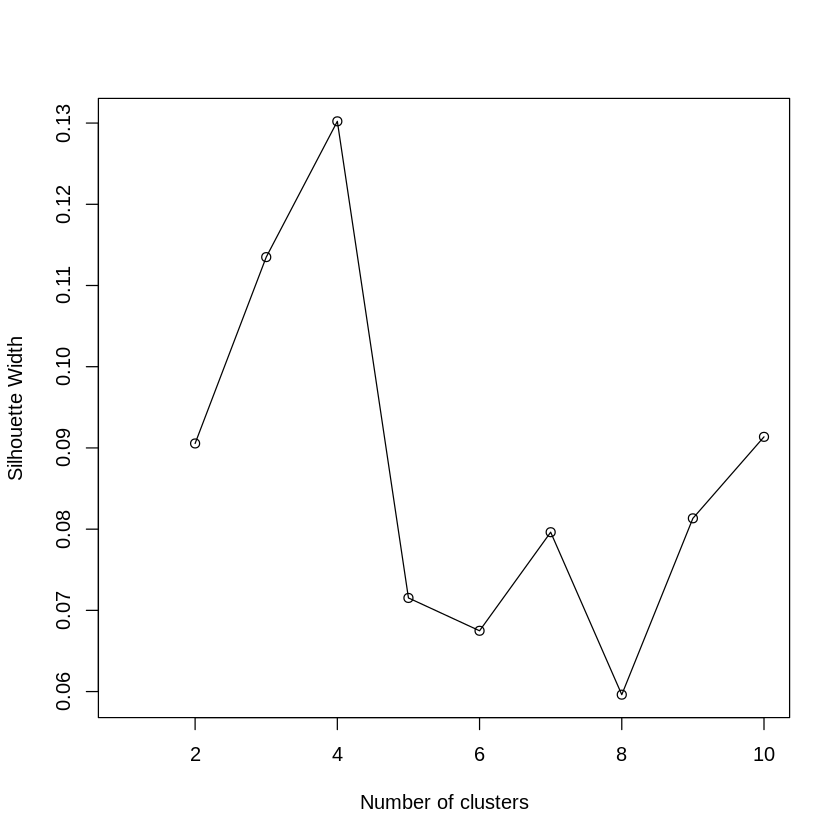

In [26]:
# Calculate silhouette width for many k using PAM

sil_width <- c(NA)

for(i in 2:10){
  
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
  
}

# Plot sihouette width (higher is better)

plot(1:10, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil_width)


In [27]:
pam_fit <- pam(gower_dist, diss = TRUE, k = which(sil_width == max(sil_width, na.rm = T)))

In [28]:
tordered_data[pam_fit$medoids, ]

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,ENSG00000244734.3,ENSG00000198804.2,ENSG00000156508.17,ENSG00000198938.2,ENSG00000198886.2,ENSG00000005381.7,ENSG00000210082.2,ENSG00000198888.2,ENSG00000090382.6,ENSG00000198712.1,⋯,ENSG00000210135.1,ENSG00000210151.2,ENSG00000210154.1,ENSG00000210156.1,ENSG00000210164.1,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000210195.2
10H051,1184975,804497,558336,471910,592946,362169,560310,355231,399692,429857,⋯,0,0,0,0,0,0,0,0,0,0
12H067,402902,1287607,770969,1222527,879517,1060,1323745,447823,855,1317004,⋯,0,0,0,0,0,0,1,1,0,2
11H170,104491,385429,968455,202870,209480,4651,118062,48830,21661,210362,⋯,0,0,0,0,0,0,0,0,0,0
11H145,103793,618881,655168,533912,467816,11048,394623,312110,156966,365889,⋯,0,0,0,0,0,0,0,0,0,0


Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


  cluster size ave.sil.width
1       1    7          0.13
2       2    2          0.28
3       3    3          0.24
4       4    4         -0.02


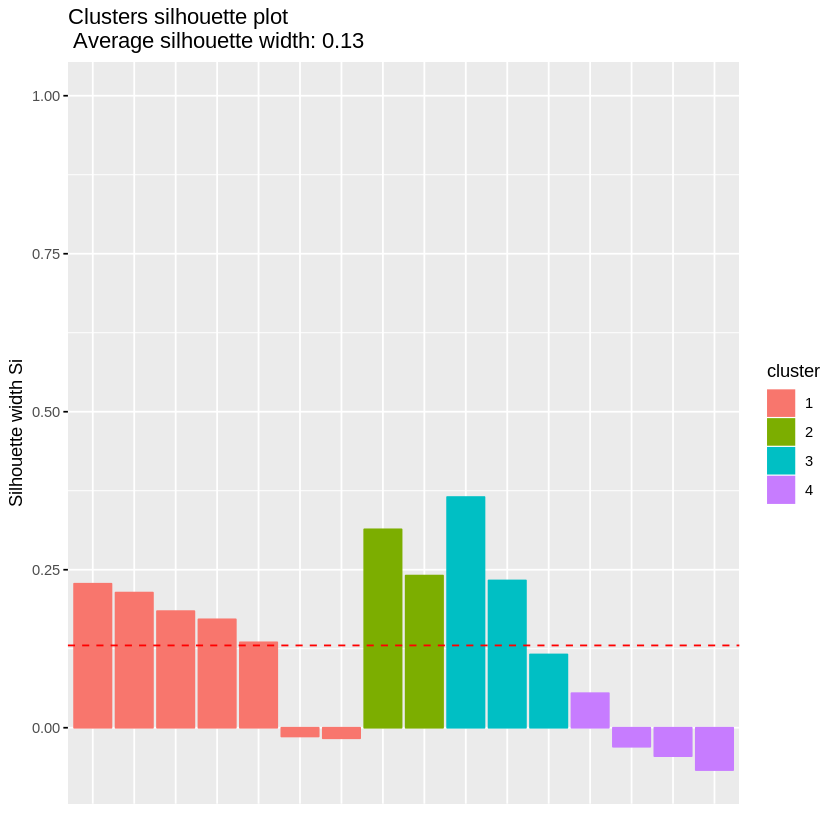

In [29]:
library(factoextra)
fviz_silhouette(silhouette(pam_fit)) 

It can be seen that some samples have a negative silhouette. This means that they are not in the right cluster. We can find the name of these samples and determine the clusters they are closer, as follow:

In [30]:
# Compute silhouette
sil <- silhouette(pam_fit)[, 1:3]
# Objects with negative silhouette
neg_sil_index <- which(sil[, 'sil_width'] < 0)
sil[neg_sil_index, , drop = FALSE]

,cluster,neighbor,sil_width
08H054,1,4,-0.01376194
04H132,1,3,-0.01664649
11H127,4,1,-0.02999598
11H140,4,3,-0.04491028
10H066,4,1,-0.06691470


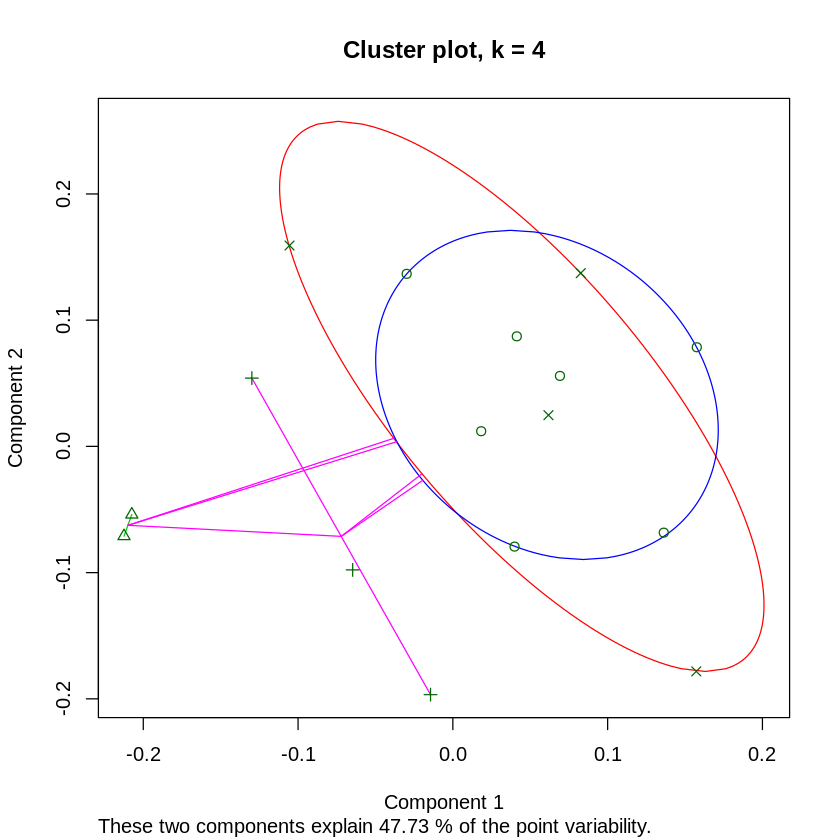

In [31]:
clusplot(pam_fit, main = "Cluster plot, k = 4", 
         color = TRUE)

In [32]:
df_IF = count_complex


samples_IF <-  data.frame(groups = as.character(as.vector(pam_fit$clustering)))

ds_IF <- DESeqDataSetFromMatrix(countData=df_IF, colData=samples_IF, design=~groups)

In [33]:
ds_IF <-DESeq(ds_IF)
res_IF <- results(ds_IF)
res_IF

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 1618 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


log2 fold change (MLE): groups 4 vs 1 
Wald test p-value: groups 4 vs 1 
DataFrame with 60554 rows and 6 columns
                           baseMean      log2FoldChange             lfcSE
                          <numeric>           <numeric>         <numeric>
ENSG00000223972.5  10.3726449558267  -0.913300654953345  1.00762158545455
ENSG00000227232.5  248.423551097161   0.787500692454245 0.309693047864654
ENSG00000278267.1  15.0885550562645     1.6811098536032   0.5574910122113
ENSG00000243485.3  6.07577363605412   0.015108902238779 0.975236273543823
ENSG00000274890.1                 0                  NA                NA
...                             ...                 ...               ...
ENSG00000198695.2  31954.1372153071   -0.23125966229924 0.506889486977831
ENSG00000210194.1 0.347364893037548  -0.817905002118801  2.97621367288593
ENSG00000198727.2  256276.417013042   -0.31264079281023 0.483403885720528
ENSG00000210195.2 0.302654441512814  -0.318297789964598  3.83635855735744

In [34]:
res <- results(ds_IF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_IF)))
goi

library(tidyr)

tcounts <- t(log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_IF), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)

library(ggsignif)
library("biomaRt")

mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
        if (a != ""){
            tcounts$gene[i] = a
        }
         
    }
}



row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000044524.10,379.43651,-18.017488,1.7705155,-10.176408,2.527183e-24,6.594936e-20
ENSG00000253554.5,28.26018,-16.412201,2.0400368,-8.045051,8.620931e-16,1.124859e-11
ENSG00000053371.12,2158.59115,-1.952380,0.2629561,-7.424736,1.130047e-13,9.829903e-10
ENSG00000263711.5,87.00953,-16.044643,2.1856244,-7.340989,2.120220e-13,1.383232e-09
ENSG00000204178.9,5559.58791,2.113921,0.3084795,6.852712,7.246308e-12,3.781993e-08
ENSG00000259298.1,157.50724,2.137988,0.3337980,6.405036,1.503343e-10,6.538542e-07


[1] "ENSG00000044524.10" "ENSG00000253554.5"  "ENSG00000053371.12"
[4] "ENSG00000263711.5"  "ENSG00000204178.9"  "ENSG00000259298.1" 
[7] "ENSG00000254577.1"  "ENSG00000073754.5"  "ENSG00000134538.2"


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract

The following object is masked from ‘package:S4Vectors’:

    expand



Row.names,groups,sizeFactor,replaceable,gene,expression
03H022,1,0.8758985,TRUE,ENSG00000044524.10,0.7151772
03H028,2,0.9664248,FALSE,ENSG00000044524.10,12.5641037
04H132,1,1.2795523,TRUE,ENSG00000044524.10,-1.0000000
08H033,1,1.2396643,TRUE,ENSG00000044524.10,1.0795249
08H054,1,0.8122747,TRUE,ENSG00000044524.10,0.7916979
09H054,3,0.7290993,FALSE,ENSG00000044524.10,-1.0000000


In [35]:
library(ggpubr)

my_comparisons = list( c("1", "2"), c("2", "3"), c("3", "4"), c("1", "3"), c("2", "4"), c("1", "4") )


Attaching package: ‘ggpubr’

The following object is masked from ‘package:dendextend’:

    rotate

The following object is masked from ‘package:plyr’:

    mutate



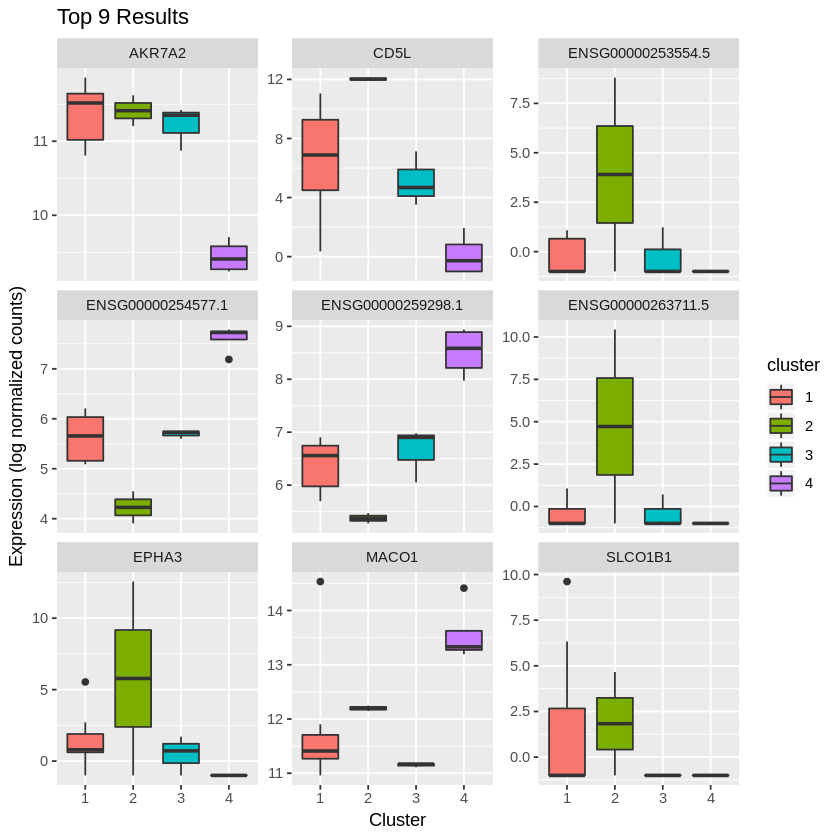

In [36]:
ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot()+ 
  #stat_compare_means(comparisons = my_comparisons, symnum.args = list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), symbols = c("****", "***", "**", "*", "ns")))+ # Add pairwise comparisons p-value
  #stat_compare_means()+ # Add global p-value
  #stat_compare_means(label = "p.signif", method = "t.test", ref.group = "0.5")+
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cluster", 
       y="Expression (log normalized counts)", 
       fill="cluster", 
       title="Top 9 Results")
  #+ylim(0,30)


### Enrichment analysis

Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”



|Gene.symbol       |      logFC| adj.P.Val|
|:-----------------|----------:|---------:|
|EPHA3             | -18.017488|     0e+00|
|ENSG00000253554.5 | -16.412201|     0e+00|
|AKR7A2            |  -1.952380|     0e+00|
|ENSG00000263711.5 | -16.044643|     0e+00|
|MACO1             |   2.113921|     0e+00|
|ENSG00000259298.1 |   2.137988|     7e-07|

Warning message in run_pathfindR(res_mart_na, pin_name = "KEGG", gene_sets = "KEGG", :
“There already is a directory named "pathfindR_Results".
Writing the result to "pathfindR_Results(2)" not to overwrite the previous results.”## Testing input


The input looks OK


## Processing input. Converting gene symbols, if necessary (and if human gene symbols provied)


Warning message in pathfindR::input_processing(input, p_val_threshold, pin_path, :
“pathfindR cannot handle p values < 1e-13
These were changed to 1e-13”Could not find any interactions for 1112 (77.49%) genes in the PIN


## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations 


## Annotating involved genes and visualizing pathways


'select()' returned 1:1 mapping between keys and columns


[1] "Note: 2 of 321 unique input IDs unmapped."


Info: Downloading xml files for hsa04392, 1/1 pathways..
Info: Downloading png files for hsa04392, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/safia/Documents/pathfindR_Results(2)/pathway_visualizations
Info: Writing image file hsa04392.Hippo signaling pathway - multiple species.png
'select()' returned 1:1 mapping between keys and columns


[1] "Note: 2 of 321 unique input IDs unmapped."


Info: Downloading xml files for hsa04390, 1/1 pathways..
Info: Downloading png files for hsa04390, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/safia/Documents/pathfindR_Results(2)/pathway_visualizations
Info: Writing image file hsa04390.Hippo signaling pathway.png
'select()' returned 1:1 mapping between keys and columns


[1] "Note: 2 of 321 unique input IDs unmapped."


Info: Downloading xml files for hsa05142, 1/1 pathways..
Info: Downloading png files for hsa05142, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/safia/Documents/pathfindR_Results(2)/pathway_visualizations
Info: Writing image file hsa05142.Chagas disease (American trypanosomiasis).png
'select()' returned 1:1 mapping between keys and columns


[1] "Note: 2 of 321 unique input IDs unmapped."


Info: Downloading xml files for hsa05418, 1/1 pathways..
Info: Downloading png files for hsa05418, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/safia/Documents/pathfindR_Results(2)/pathway_visualizations
Info: Writing image file hsa05418.Fluid shear stress and atherosclerosis.png
'select()' returned 1:1 mapping between keys and columns


[1] "Note: 2 of 321 unique input IDs unmapped."


Info: Downloading xml files for hsa04380, 1/1 pathways..
Info: Downloading png files for hsa04380, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/safia/Documents/pathfindR_Results(2)/pathway_visualizations
Info: Writing image file hsa04380.Osteoclast differentiation.png
'select()' returned 1:1 mapping between keys and columns


[1] "Note: 2 of 321 unique input IDs unmapped."


Info: Downloading xml files for hsa00052, 1/1 pathways..
Info: Downloading png files for hsa00052, 1/1 pathways..
Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Co

[1] "Note: 2 of 321 unique input IDs unmapped."


Info: Downloading xml files for hsa03320, 1/1 pathways..
Info: Downloading png files for hsa03320, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/safia/Documents/pathfindR_Results(2)/pathway_visualizations
Info: Writing image file hsa03320.PPAR signaling pathway.png
## Creating HTML report




processing file: results.Rmd


  |......................                                           |  33%
   inline R code fragments

  |...........................................                      |  67%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |.................................................................| 100%
  ordinary text without R code




output file: results.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS results.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc19256c6dfd8c.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmp2MVnZs/rmarkdown-str19257417816e.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: results.html


processing file: enriched_pathways.Rmd


  |.......                                                          |  11%
   inline R code fragments

  |..............                                                   |  22%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |......................                                           |  33%
  ordinary text without R code

  |.............................                                    |  44%
label: pathview (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA

  |....................................                             |  56%
  ordinary text without R code

  |...........................................                      |  67%
label: table (with options) 
List of 2
 $ echo   : symbol F
 $ comment: logi NA

  |...................................................              |  78%
  ordinary text without R code

  |..........................................................       |  89%
label: pathview_ref (with options) 
List of 2


output file: enriched_pathways.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS enriched_pathways.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc192572eb5b3.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmp2MVnZs/rmarkdown-str19256dea7edc.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: enriched_pathways.html


processing file: conversion_table.Rmd


  |...........                                                      |  17%
   inline R code fragments

  |......................                                           |  33%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |................................                                 |  50%
  ordinary text without R code

  |...........................................                      |  67%
label: table1 (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA

  |......................................................           |  83%
  ordinary text without R code

  |.................................................................| 100%
label: table2 (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA




output file: conversion_table.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS conversion_table.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc19251f118f83.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmp2MVnZs/rmarkdown-str19253b8bd0b3.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: conversion_table.html
Plotting the enrichment bubble chart


Found 7 enriched pathways


Pathway enrichment results and table of converted genes 
can be found in "results.html" 
in the folder "/home/safia/Documents/pathfindR_Results(2)"


Run choose_clusters() for clustering pathways






|ID       |Pathway                                    | Fold_Enrichment| occurrence|  lowest_p| highest_p|Up_regulated                                                                 |Down_regulated     |
|:--------|:------------------------------------------|---------------:|----------:|---------:|---------:|:----------------------------------------------------------------------------|:------------------|
|hsa04392 |Hippo signaling pathway - multiple species |        6.713601|          1| 0.0002061| 0.0002061|RASSF6, MOB1B                                                                |WWC1, RASSF4       |
|hsa04390 |Hippo signaling pathway                    |        2.954826|          1| 0.0002431| 0.0002431|PARD6B, RASSF6, PPP2CB, MOB1B, CSNK1D, AREG, SMAD3, SMAD4, WNT8A, FZD3, FZD6 |WWC1, BMP2, BMPR1B |

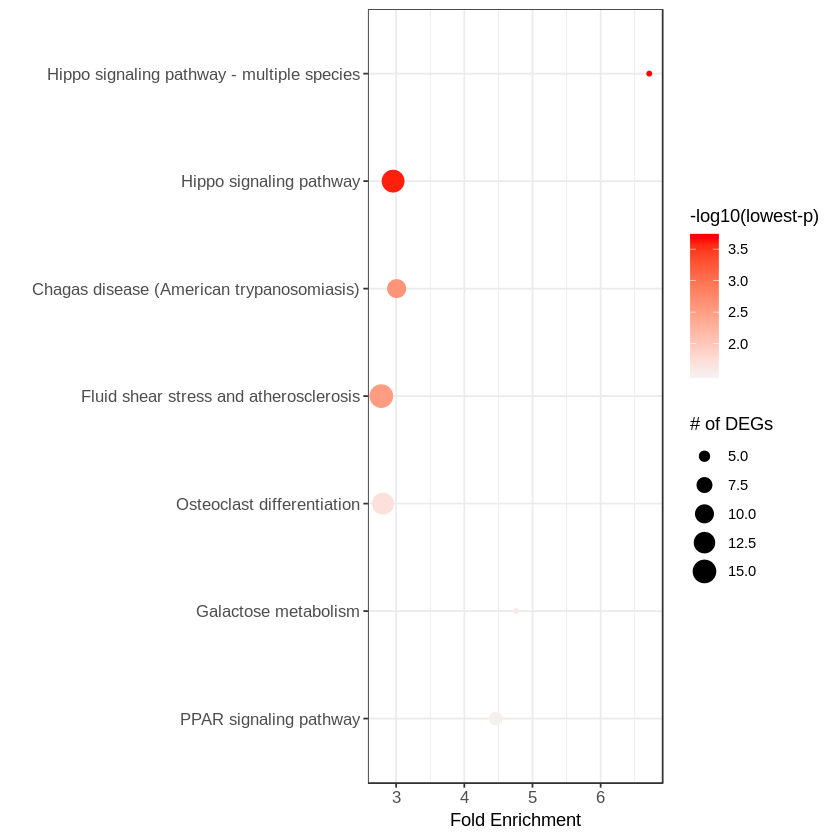

In [37]:
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- res$row
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
                                                          "hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
  if (genes[i] %in% G_list$ensembl_gene_id){
    a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    if (a != ""){
      res$row[i] = a
    }
    
  }
}


res_mart = res[,c(1,3,7)]
colnames(res_mart)= c("Gene.symbol","logFC","adj.P.Val")

res_mart_na = as.data.frame(na.omit(res_mart))
res_mart_na$adj.P.Val = as.numeric(as.character(res_mart_na$adj.P.Val))

suppressPackageStartupMessages(library(pathfindR))

knitr::kable(head(res_mart_na))
RA_output <- run_pathfindR(res_mart_na, pin_name = "KEGG", gene_sets = "KEGG", search_method = "SA")
knitr::kable(head(RA_output, 2))



The maximum average silhouette width was 2.66 for k = 4 






|ID       |Pathway                                    | Fold_Enrichment| occurrence|  lowest_p| highest_p|Up_regulated                                                                 |Down_regulated     | Cluster|Status         |
|:--------|:------------------------------------------|---------------:|----------:|---------:|---------:|:----------------------------------------------------------------------------|:------------------|-------:|:--------------|
|hsa04392 |Hippo signaling pathway - multiple species |        6.713601|          1| 0.0002061| 0.0002061|RASSF6, MOB1B                                                                |WWC1, RASSF4       |       1|Representative |
|hsa04390 |Hippo signaling pathway                    |        2.954826|          1| 0.0002431| 0.0002431|PARD6B, RASSF6, PPP2CB, MOB1B, CSNK1D, AREG, SMAD3, SMAD4, WNT8A, FZD3, FZD6 |WWC1, BMP2, BMPR1B |       1|Member         |



|   |ID       |Pathway                                    | Fold_Enrichment| occurrence|  lowest_p| highest_p|Up_regulated                                |Down_regulated          | Cluster|Status         |
|:--|:--------|:------------------------------------------|---------------:|----------:|---------:|---------:|:-------------------------------------------|:-----------------------|-------:|:--------------|
|1  |hsa04392 |Hippo signaling pathway - multiple species |        6.713601|          1| 0.0002061| 0.0002061|RASSF6, MOB1B                               |WWC1, RASSF4            |       1|Representative |
|3  |hsa05142 |Chagas disease (American trypanosomiasis)  |        3.007016|          1| 0.0023658| 0.0023658|MAPK8, MAPK14, PPP2CB, PIK3CA, SMAD3, CASP8 |CALR, C1QA, C1QB, C1QC  |       2|Representative |
|6  |hsa00052 |Galactose metabolism                       |        4.760554|          1| 0.0260842| 0.0260842|                                            |GALK1, HK2, G6PC3, 

The maximum average silhouette width was 2.66 for k = 4 




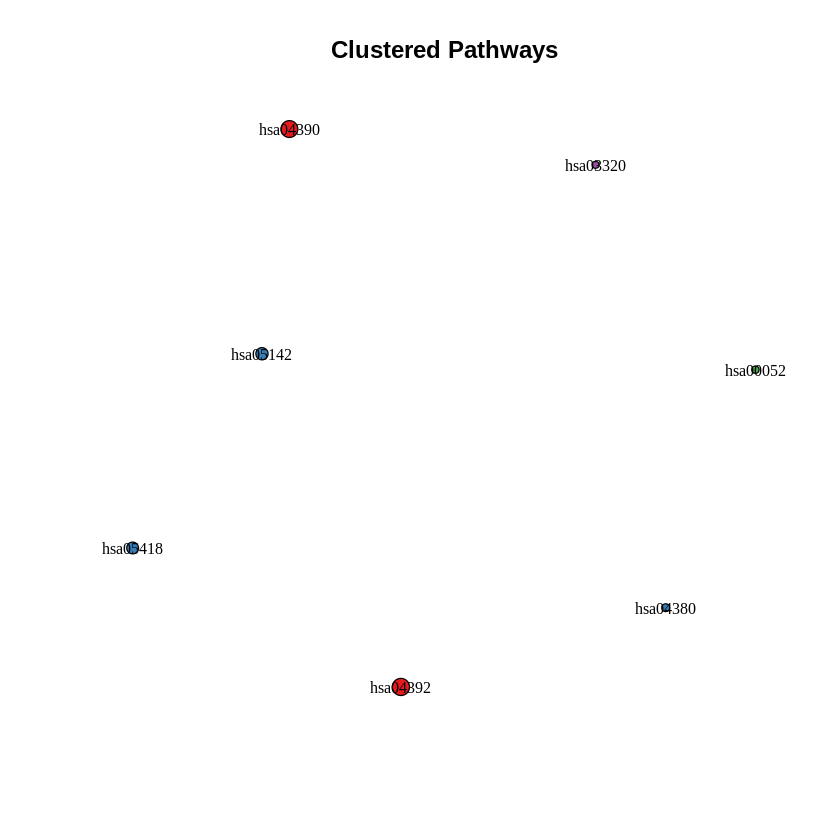

The maximum average silhouette width was 2.66 for k = 4 




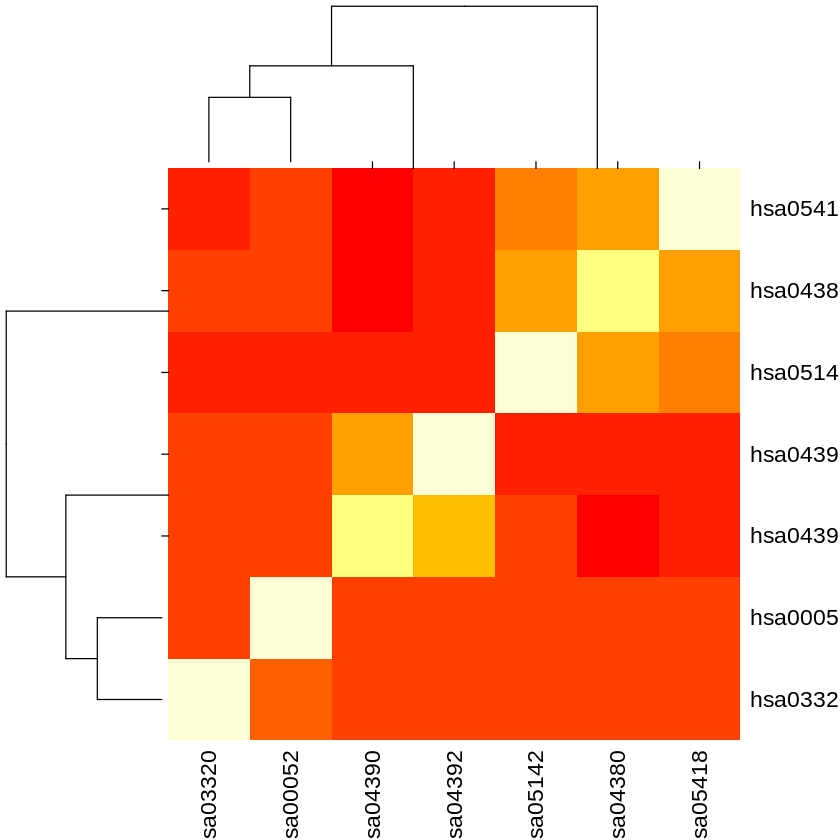

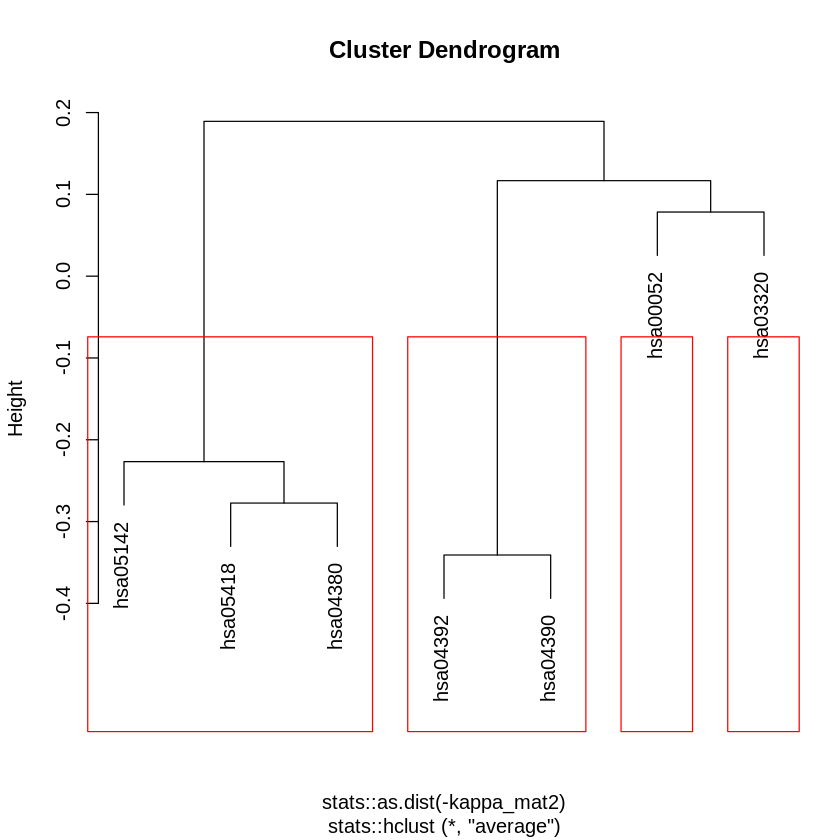

In [38]:
RA_clustered <- cluster_pathways(RA_output)
knitr::kable(head(RA_clustered, 2))
knitr::kable(RA_clustered[RA_clustered$Status == "Representative", ])
RA_clustered <- cluster_pathways(RA_output, plot_hmap = TRUE, plot_clusters_graph = FALSE)
RA_clustered <- cluster_pathways(RA_output, plot_dend = TRUE, plot_clusters_graph = FALSE)


In [39]:
## Pathway scores per samples
## Pathway data frame
pws_table <- RA_clustered
pws_table <- pws_table[pws_table$Status == "Representative", ]


## Expression matrix
  goi <- rownames(res_IF)
stopifnot(all(goi %in% names(ds_IF)))
exp_mat <- log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))

colnames(exp_mat) = colnames(df_IF)

mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- rownames(exp_mat)
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
                                                          "hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
  if (genes[i] %in% G_list$ensembl_gene_id){
    a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    if (a != ""){
      rownames(exp_mat)[i] = a
    }
    
  }
}





Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”

In [40]:
head(exp_mat)

,03H022,03H028,04H132,08H033,08H054,09H054,10H051,10H066,11H017,11H044,11H127,11H140,11H145,11H170,12H067,12H149
DDX11L1,0.7151772,3.439280,3.185352,3.457687,0.7916979,5.516057,1.060569,2.303938,-1.000000,2.8122870,1.445738,1.164137,0.4571441,6.011287,2.109890,2.067792
WASH7P,7.1033107,8.408946,8.297707,7.194828,8.2152789,7.367079,7.593720,8.371270,7.626810,7.3703673,8.543124,8.203239,8.7537978,7.875261,7.866114,6.988302
MIR6859-1,3.0860694,3.691188,3.055757,3.098740,3.6793231,3.683022,3.205024,4.928690,3.553490,0.5180274,3.538552,4.825576,5.1462015,3.940897,5.199968,2.354892
MIR1302-2HG,0.7151772,1.361478,2.913361,3.829179,-1.0000000,3.829398,2.394311,2.303938,2.712128,2.8122870,-1.000000,4.162687,0.4571441,3.269518,2.638045,2.354892
ENSG00000274890.1,-1.0000000,-1.000000,-1.000000,-1.000000,-1.0000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0000000,-1.000000,-1.000000,-1.0000000,-1.000000,-1.000000,-1.000000
FAM138A,-1.0000000,-1.000000,-1.000000,-1.000000,-1.0000000,-1.000000,-1.000000,0.686621,-1.000000,-1.0000000,-1.000000,-1.000000,-1.0000000,-1.000000,-1.000000,-1.000000


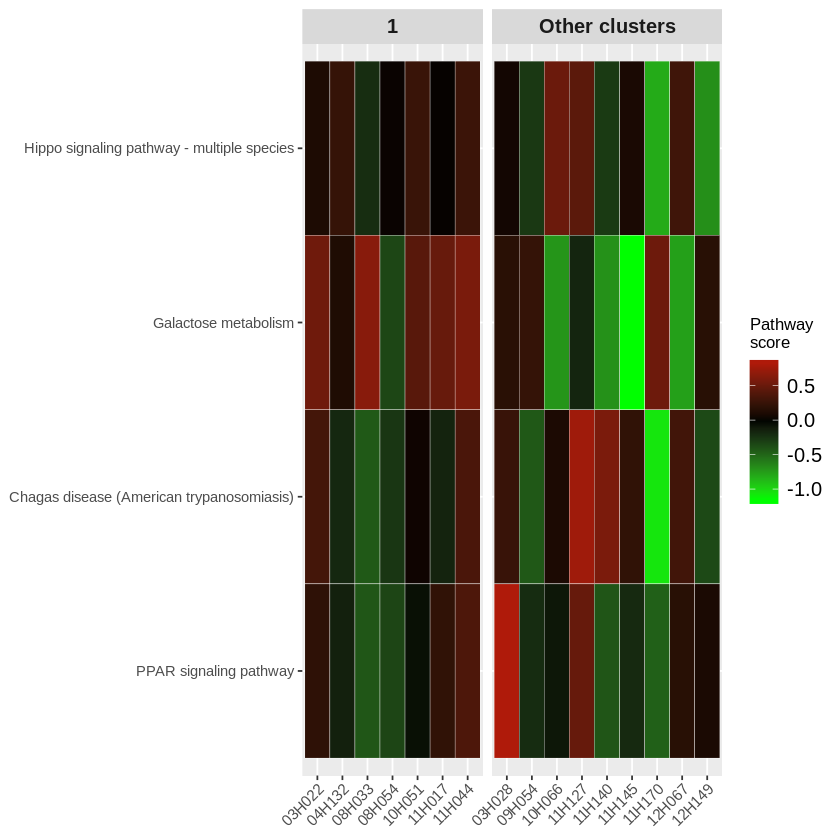

In [63]:
## Vector of "Case" IDs
cases <- names(pam_fit$clustering[which(pam_fit$clustering == 1)])

## Calculate pathway scores and plot heatmap
score_matrix <- calculate_pw_scores(pws_table, exp_mat, cases, case_control_titles = c("1", "Other clusters"))

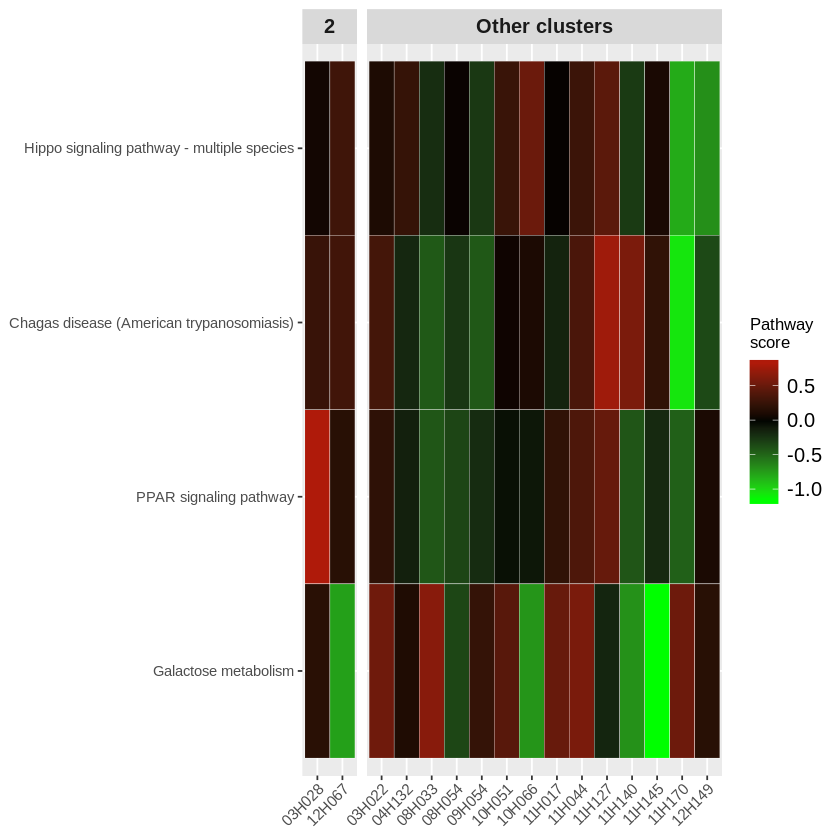

In [62]:
## Vector of "Case" IDs
cases <- names(pam_fit$clustering[which(pam_fit$clustering == 2)])

## Calculate pathway scores and plot heatmap
score_matrix <- calculate_pw_scores(pws_table, exp_mat, cases, case_control_titles = c("2", "Other clusters"))

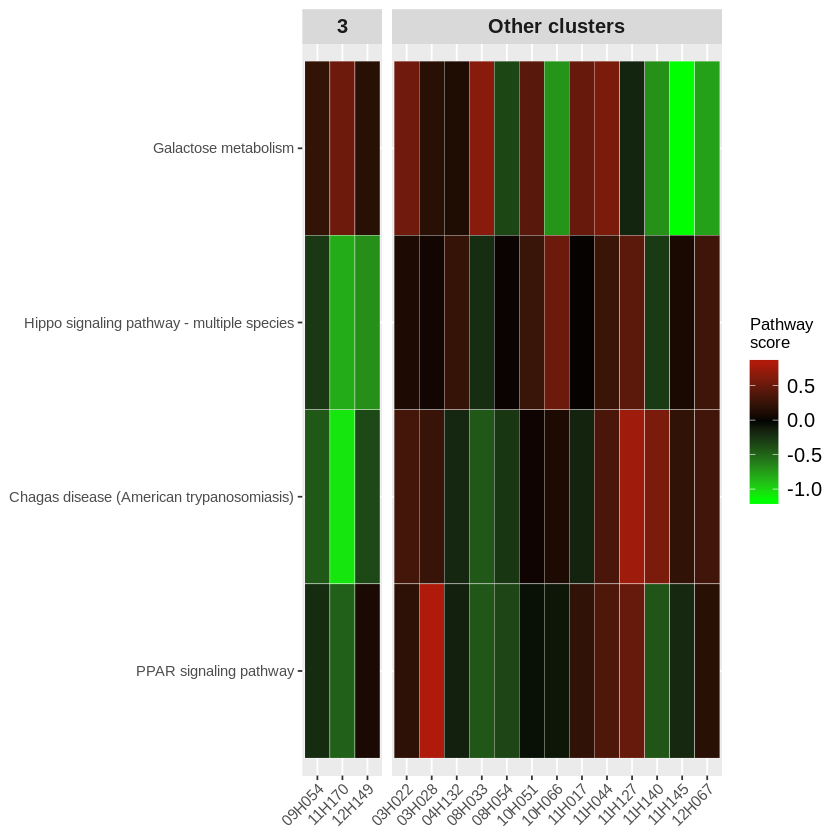

In [64]:
## Vector of "Case" IDs
cases <- names(pam_fit$clustering[which(pam_fit$clustering == 3)])

## Calculate pathway scores and plot heatmap
score_matrix <- calculate_pw_scores(pws_table, exp_mat, cases, case_control_titles = c("3", "Other clusters"))

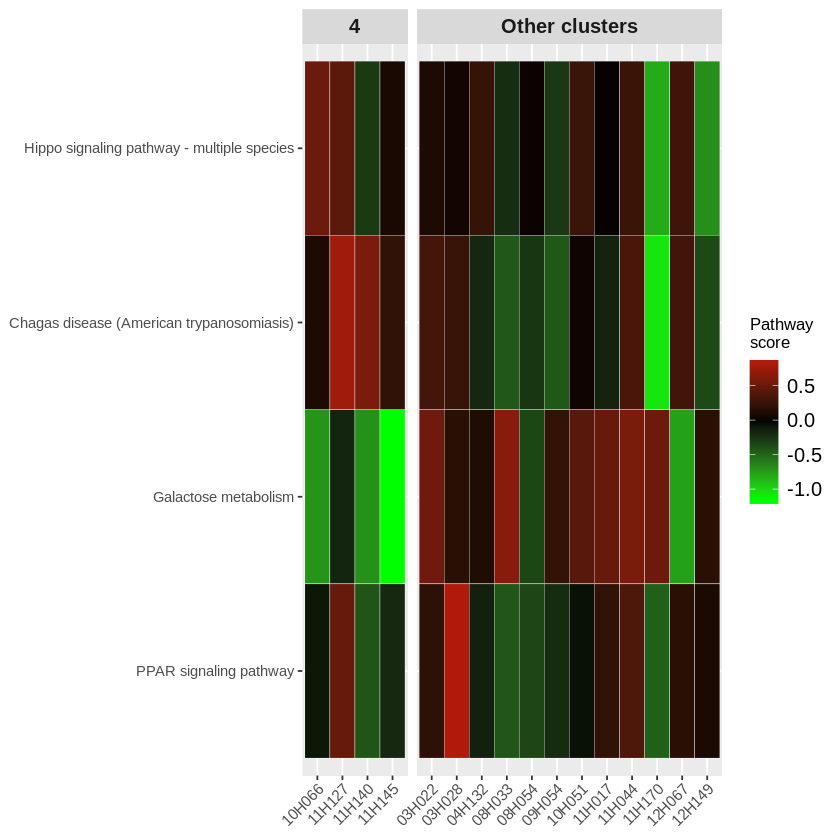

In [65]:
## Vector of "Case" IDs
cases <- names(pam_fit$clustering[which(pam_fit$clustering == 4)])

## Calculate pathway scores and plot heatmap
score_matrix <- calculate_pw_scores(pws_table, exp_mat, cases, case_control_titles = c("4", "Other clusters"))